<a href="https://colab.research.google.com/github/Anu589/Sea-Ice-Index-/blob/main/Sea_Ice_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
url="/content/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx"

In [16]:
df=pd.read_excel(url)

In [17]:
#df.info()

In [18]:
df.rename(columns={"Unnamed: 0": "Month", "Unnamed: 1": "Date"}, inplace=True)

In [19]:
filled_month = None  # Initialize variable to track the current month
for i in range(len(df)):
    if pd.notna(df.loc[i, "Month"]):  # If Month is not NaN, update the tracker
        filled_month = df.loc[i, "Month"]
    else:  # Otherwise, fill with the last known month
        df.loc[i, "Month"] = filled_month

In [20]:
df.drop(columns=[df.columns[50]], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             366 non-null    object 
 1   Date              366 non-null    int64  
 2   1978              34 non-null     float64
 3   1979              182 non-null    float64
 4   1980              183 non-null    float64
 5   1981              183 non-null    float64
 6   1982              182 non-null    float64
 7   1983              183 non-null    float64
 8   1984              183 non-null    float64
 9   1985              182 non-null    float64
 10  1986              183 non-null    float64
 11  1987              220 non-null    float64
 12  1988              354 non-null    float64
 13  1989              365 non-null    float64
 14  1990              365 non-null    float64
 15  1991              365 non-null    float64
 16  1992              366 non-null    float64
 1

In [22]:
# Initialize an empty list to store data
df_long = []

# Iterate over each row (excluding the header)
for i in range(len(df)):
    for j in range(2, 50):  # Skip Month and Date columns, avoid last 2 columns
        year = df.columns[j]  # Year is in the column name
        month = df.iloc[i, 0]  # Month is in the first column
        day = df.iloc[i, 1]  # Date is in the second column
        temp = df.iloc[i, j]  # Sea-Ice-Index-Rate value

        # Only add valid Sea-Ice-Index-Rate readings
        df_long.append([pd.to_datetime(f"{year}-{month}-{day}", errors="coerce"), year, month, day, temp])


In [23]:
# Convert to DataFrame
df_long = pd.DataFrame(df_long, columns=["Date", "Year", "Month", "Day", "Sea-Ice-Index-Rate"])

In [24]:
# Sort df_long by Date in ascending order
df_long = df_long.sort_values(by="Date").reset_index(drop=True)

In [25]:
df_long = df_long.dropna(subset=["Date"]).reset_index(drop=True)

In [26]:
df_long

,Date,Year,Month,Day,Sea-Ice-Index-Rate
0,1978-01-01,1978,January,1,NaN
1,1978-01-02,1978,January,2,NaN
2,1978-01-03,1978,January,3,NaN
3,1978-01-04,1978,January,4,NaN
4,1978-01-05,1978,January,5,NaN
...,...,...,...,...,...
17527,2025-12-27,2025,December,27,NaN
17528,2025-12-28,2025,December,28,NaN
17529,2025-12-29,2025,December,29,NaN
17530,2025-12-30,2025,December,30,NaN


In [27]:
# Identify the first and last index where Sea-Ice-Index-Rate is NOT NaN
first_valid_index = df_long["Sea-Ice-Index-Rate"].first_valid_index()
last_valid_index = df_long["Sea-Ice-Index-Rate"].last_valid_index()

# Trim the DataFrame to keep only the valid range
df_long= df_long.loc[first_valid_index:last_valid_index].reset_index(drop=True)

In [28]:
# Set Date as index
df_long.set_index("Date", inplace=True)

# Apply time-based interpolation
df_long["Sea-Ice-Index-Rate"] = df_long["Sea-Ice-Index-Rate"].interpolate(method="nearest")

# Reset index to keep Date as a column
df_long.reset_index(inplace=True)

In [29]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16944 entries, 0 to 16943
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16944 non-null  datetime64[ns]
 1   Year                16944 non-null  int64         
 2   Month               16944 non-null  object        
 3   Day                 16944 non-null  int64         
 4   Sea-Ice-Index-Rate  16944 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 662.0+ KB


In [30]:
df_long.tail()

,Date,Year,Month,Day,Sea-Ice-Index-Rate
16939,2025-03-12,2025,March,12,14.197
16940,2025-03-13,2025,March,13,14.192
16941,2025-03-14,2025,March,14,14.238
16942,2025-03-15,2025,March,15,14.261
16943,2025-03-16,2025,March,16,14.333


In [31]:
# Convert Year to integer
df_long["Year"] = df_long["Year"].astype(int)

# Filter only for years 1981 to 2010
df_filtered = df_long[(df_long["Year"] >= 1981) & (df_long["Year"] <= 2010)].copy()

# Convert Month names to numbers for proper sorting
df_filtered["Month_Num"] = pd.to_datetime(df_filtered["Month"], format="%B").dt.month

# Sort by Month (numeric), Day, then Year
df_filtered_sorted = df_filtered.sort_values(by=["Month_Num", "Day", "Year"]).drop(columns=["Month_Num"])

# Reset index
df_filtered_sorted.reset_index(drop=True, inplace=True)

# Display first 10 rows
print(df_filtered_sorted.head(10))


        Date  Year    Month  Day  Sea-Ice-Index-Rate
0 1981-01-01  1981  January    1              14.256
1 1982-01-01  1982  January    1              14.224
2 1983-01-01  1983  January    1              14.253
3 1984-01-01  1984  January    1              13.907
4 1985-01-01  1985  January    1              13.789
5 1986-01-01  1986  January    1              14.036
6 1987-01-01  1987  January    1              14.089
7 1988-01-01  1988  January    1              14.826
8 1989-01-01  1989  January    1              14.261
9 1990-01-01  1990  January    1              14.319


In [32]:
# Group by Month and Day, then compute mean and median Sea-Ice-Index-Rate
df_summary = df_filtered_sorted.groupby(["Month", "Day"])["Sea-Ice-Index-Rate"].agg(["mean", "median"]).reset_index()

# Rename columns for clarity
df_summary.columns = ["Month", "Day", "Sea-Ice-Index-Rate_Mean", "Sea-Ice-Index-Rate_Median"]

# Create a temporary date column using a placeholder year (e.g., 2000)
df_summary["Sea-Ice-Index-Rate_Date"] = pd.to_datetime(df_summary["Month"] + " " + df_summary["Day"].astype(str) + " 2000")

# Sort by the new date column
df_summary_sorted = df_summary.sort_values(by=["Sea-Ice-Index-Rate_Date"]).drop(columns=["Sea-Ice-Index-Rate_Date"]).reset_index(drop=True)

# Display first few rows
print(df_summary_sorted.head(10))


     Month  Day  Sea-Ice-Index-Rate_Mean  Sea-Ice-Index-Rate_Median
0  January    1                13.797900                    13.8135
1  January    2                13.865933                    13.9610
2  January    3                13.911933                    13.9630
3  January    4                13.953800                    13.9985
4  January    5                13.997133                    14.1105
5  January    6                14.050400                    14.1795
6  January    7                14.109667                    14.2250
7  January    8                14.152200                    14.3120
8  January    9                14.189200                    14.3065
9  January   10                14.212733                    14.2515


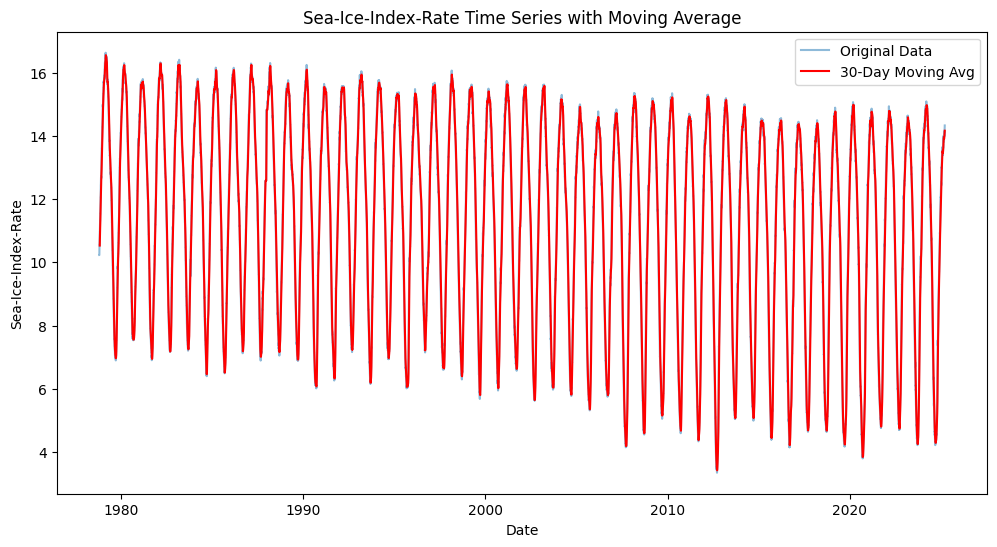

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df_long["Date"], df_long["Sea-Ice-Index-Rate"], label="Original Data", alpha=0.5)
plt.plot(df_long["Date"], df_long["Sea-Ice-Index-Rate"].rolling(10).mean(), label="30-Day Moving Avg", color="red")
plt.xlabel("Date")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Sea-Ice-Index-Rate Time Series with Moving Average")
plt.legend()
plt.show()

The decomposition results are stored in result, which contains:

- result.observed → Original time series

- result.trend → Underlying trend component

- result.seasonal → Repeating seasonal pattern

- result.resid → Residual (random noise)

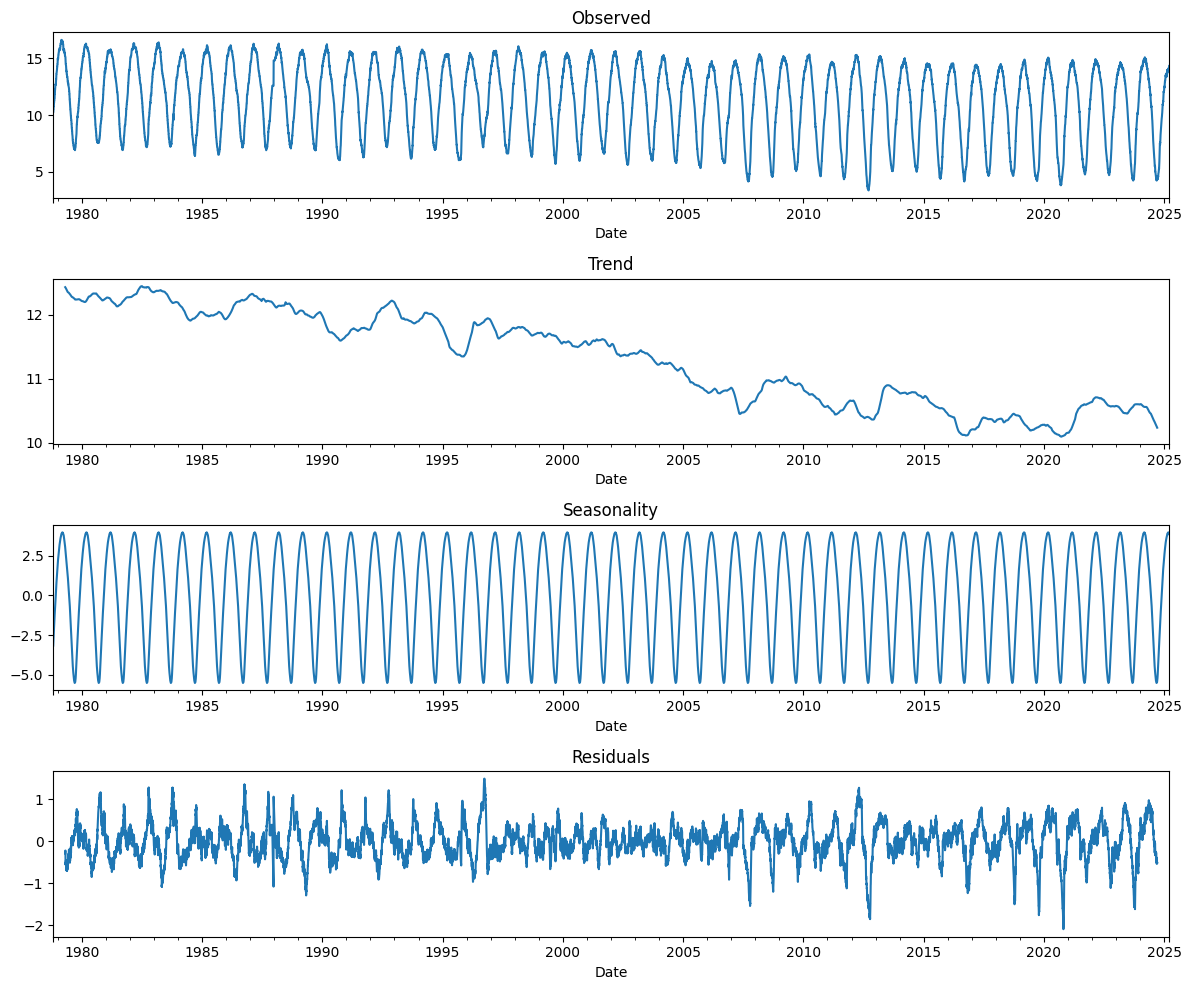

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_long.set_index("Date")["Sea-Ice-Index-Rate"], model="additive", period=365)

fig, ax = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax[0], title="Observed")
result.trend.plot(ax=ax[1], title="Trend")
result.seasonal.plot(ax=ax[2], title="Seasonality")
result.resid.plot(ax=ax[3], title="Residuals")
plt.tight_layout()
plt.show()


In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model
model = ARIMA(df_long["Sea-Ice-Index-Rate"], order=(1,1,1))
fit = model.fit()

# Generate in-sample predictions
df_long["Forecast"] = fit.fittedvalues


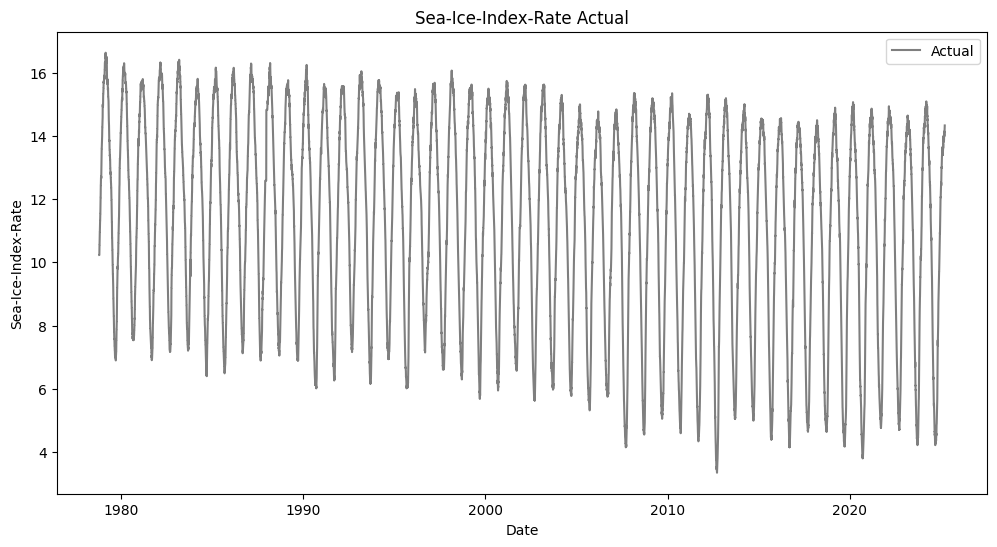

In [36]:
# Plot Actual
plt.figure(figsize=(12, 6))
plt.plot(df_long["Date"], df_long["Sea-Ice-Index-Rate"], label="Actual", alpha=0.5, color="black")
#plt.plot(df_long["Date"], df_long["Forecast"], label="Forecast", color="green")
plt.xlabel("Date")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Sea-Ice-Index-Rate Actual")
plt.legend()
plt.show()

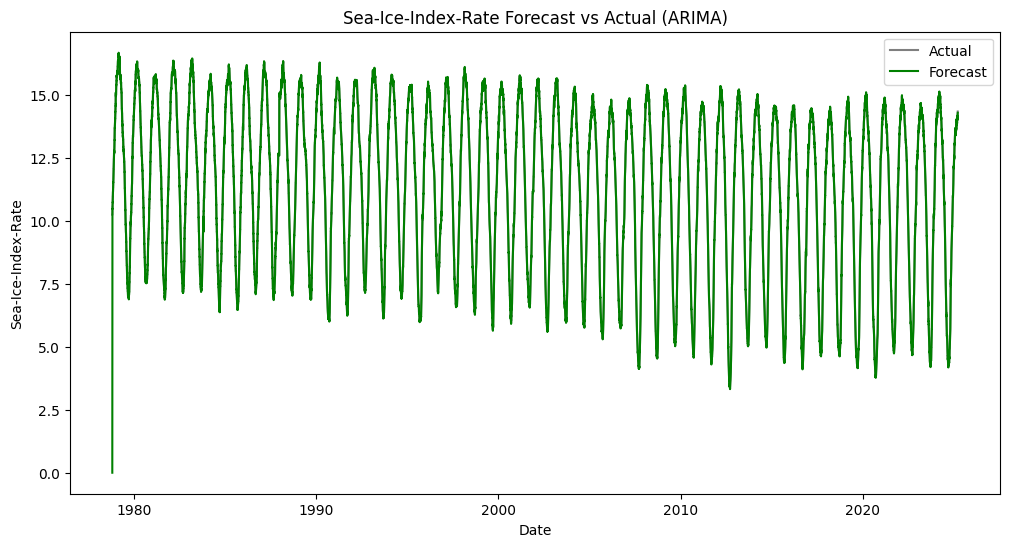

In [37]:
# Plot Actual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(df_long["Date"], df_long["Sea-Ice-Index-Rate"], label="Actual", alpha=0.5, color="black")
plt.plot(df_long["Date"], df_long["Forecast"], label="Forecast", color="green")
plt.xlabel("Date")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Sea-Ice-Index-Rate Forecast vs Actual (ARIMA)")
plt.legend()
plt.show()

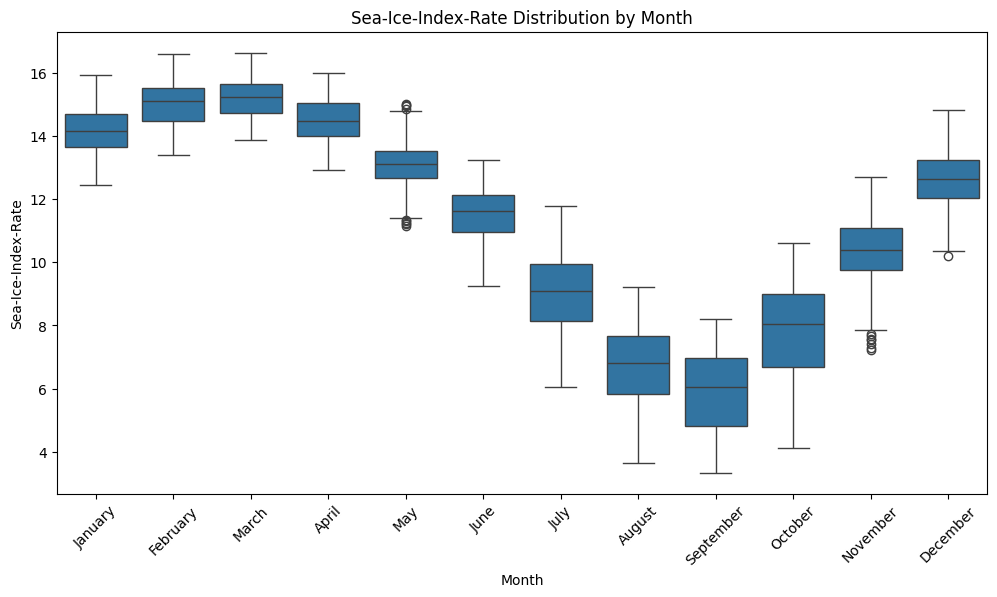

In [38]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_long["Month"], y=df_long["Sea-Ice-Index-Rate"], order=["January", "February", "March", "April", "May",
                                                                 "June", "July", "August", "September", "October",
                                                                 "November", "December"])
plt.xlabel("Month")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Sea-Ice-Index-Rate Distribution by Month")
plt.xticks(rotation=45)
plt.show()


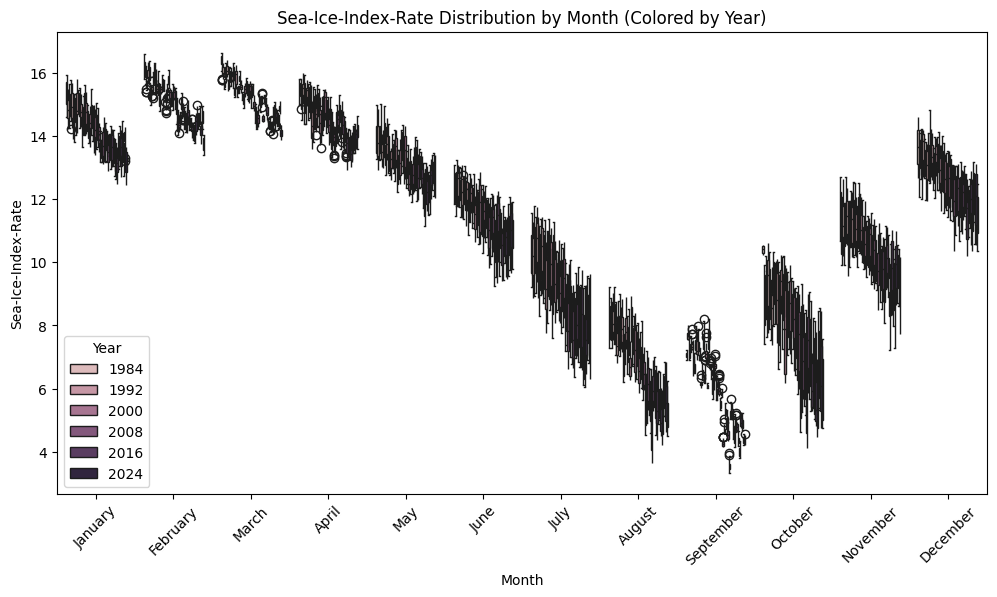

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_long["Month"], y=df_long["Sea-Ice-Index-Rate"], hue=df_long["Year"],
            order=["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"])
plt.xlabel("Month")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Sea-Ice-Index-Rate Distribution by Month (Colored by Year)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()

In [40]:
# Find the index where Date == '1988-01-01'
#index_1988_jan1 = df_long[df_long["Date"] == "1988-01-01"].index

# Print the index (serial number)
#print("Serial number for January 1, 1988:", index_1988_jan1.tolist())

In [41]:
#df_long[3350:3400]

### Working on data from 1979 to 2024

In [42]:
df_long_filtered = df_long[df_long["Year"].between(1979, 2024)]

In [43]:
df_yearly_avg = df_long_filtered.groupby("Year")["Sea-Ice-Index-Rate"].mean().reset_index()
df_yearly_avg.columns = ["Year", "Avg_Sea-Ice-Index-Rate"]

In [44]:
url_min_max="/content/Sea_Ice_Index_Min_Max_Rankings_G02135_v3.0.xlsx"

In [45]:
df_min_max=pd.read_excel(url_min_max)

In [46]:
df_min_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  46 non-null     int64  
 1   min-5-day   46 non-null     float64
 2   min-rank    46 non-null     int64  
 3   min-date    46 non-null     object 
 4   max-5-day   46 non-null     float64
 5   max-rank    46 non-null     int64  
 6   max-date    46 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 2.6+ KB


In [47]:
df_min_max.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

In [48]:
df_merged = df_yearly_avg.merge(df_min_max, on="Year", how="left")

In [49]:
df_merged

,Year,Avg_Sea-Ice-Index-Rate,min-5-day,min-rank,min-date,max-5-day,max-rank,max-date
0,1979,12.325767,6.903,35,1979-09-22,16.593,1,1979-03-02
1,1980,12.334148,7.544,46,1980-09-05,16.295,4,1980-03-08
2,1981,12.129764,6.903,36,1981-09-13,15.786,13,1981-03-17
3,1982,12.444334,7.166,42,1982-09-14,16.317,3,1982-02-28
4,1983,12.331592,7.221,45,1983-09-11,16.380,2,1983-03-15
5,1984,11.912923,6.426,31,1984-09-16,15.795,12,1984-03-21
6,1985,11.991537,6.491,32,1985-09-10,16.128,9,1985-03-18
7,1986,12.203071,7.157,41,1986-09-09,16.149,8,1986-03-13
8,1987,12.233452,6.963,39,1987-09-05,16.284,5,1987-02-24
9,1988,12.182770,7.126,40,1988-09-12,16.275,6,1988-03-12


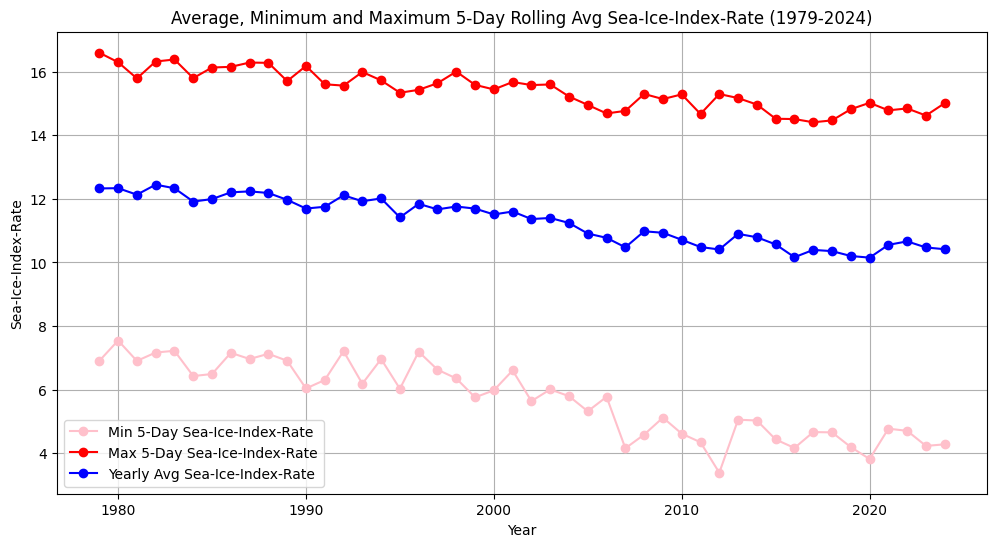

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Year"], df_merged["min-5-day"], marker="o", linestyle="-", color="pink", label="Min 5-Day Sea-Ice-Index-Rate")
plt.plot(df_merged["Year"], df_merged["max-5-day"], marker="o", linestyle="-", color="red", label="Max 5-Day Sea-Ice-Index-Rate")
plt.plot(df_merged["Year"], df_merged["Avg_Sea-Ice-Index-Rate"], marker="o", linestyle="-", color="b", label="Yearly Avg Sea-Ice-Index-Rate")
plt.xlabel("Year")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Average, Minimum and Maximum 5-Day Rolling Avg Sea-Ice-Index-Rate (1979-2024)")
plt.legend()
plt.grid(True)
plt.show()


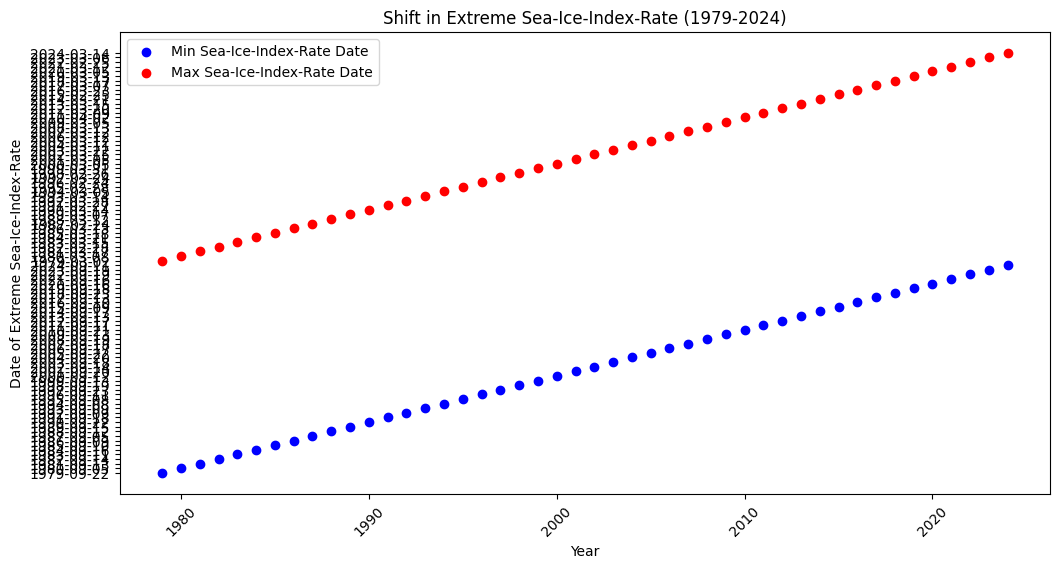

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(df_merged["Year"], df_merged["min-date"], color="blue", label="Min Sea-Ice-Index-Rate Date")
plt.scatter(df_merged["Year"], df_merged["max-date"], color="red", label="Max Sea-Ice-Index-Rate Date")
plt.xlabel("Year")
plt.ylabel("Date of Extreme Sea-Ice-Index-Rate")
plt.title("Shift in Extreme Sea-Ice-Index-Rate (1979-2024)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [52]:
df_date=df_long_filtered.copy()

In [53]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 67 to 16868
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16802 non-null  datetime64[ns]
 1   Year                16802 non-null  int64         
 2   Month               16802 non-null  object        
 3   Day                 16802 non-null  int64         
 4   Sea-Ice-Index-Rate  16802 non-null  float64       
 5   Forecast            16802 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 918.9+ KB


In [54]:
df_date.head()

,Date,Year,Month,Day,Sea-Ice-Index-Rate,Forecast
67,1979-01-01,1979,January,1,14.585,14.640775
68,1979-01-02,1979,January,2,14.997,14.634349
69,1979-01-03,1979,January,3,14.997,15.084533
70,1979-01-04,1979,January,4,14.922,15.074447
71,1979-01-05,1979,January,5,14.922,14.982537


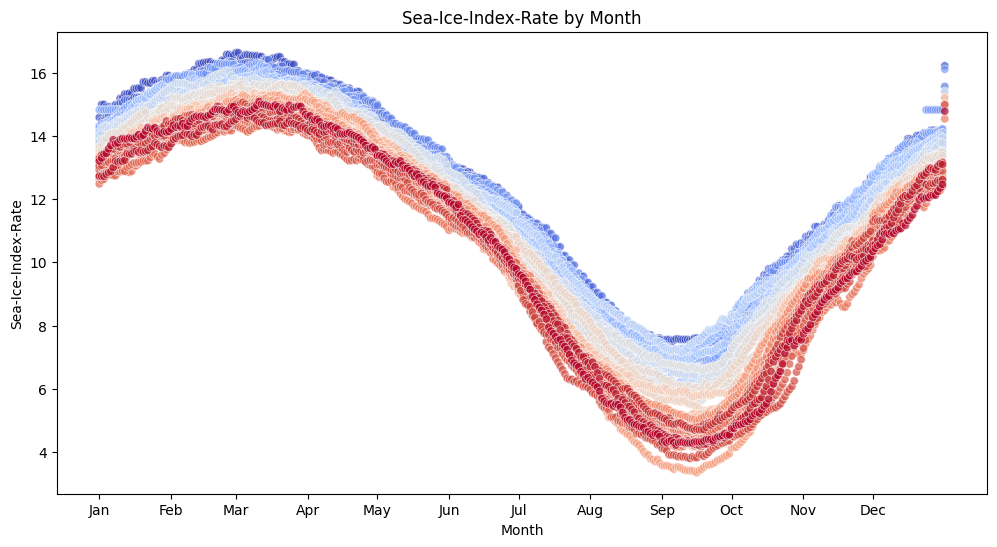

In [59]:
plt.figure(figsize=(12, 6))

# Scatter plot: X-axis = Date (without year), Y-axis = Sea-Ice-Index-Rate
sns.scatterplot(x=df_date["Date"].dt.strftime('%m-%d'),
                y=df_date["Sea-Ice-Index-Rate"],
                hue=df_date["Year"],
                palette="coolwarm",
                alpha=0.7,
                legend=False)

month_labels = ["01-01", "02-01", "03-01", "04-01", "05-01", "06-01",
                "07-01", "08-01", "09-01", "10-01", "11-01", "12-01"]
plt.xticks(month_labels, ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.xlabel("Month")
plt.ylabel("Sea-Ice-Index-Rate")
plt.title("Sea-Ice-Index-Rate by Month")
#plt.legend(title="Year")
#plt.grid(True)
#plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.show()
